# Topic 4: Functions in Python

## 4.1 Introduction
In previous weeks, we worked with Python basics, operators, and control flow.  
Now we move to **functions**, which allow us to:
- Break code into reusable pieces
- Make code modular and easier to debug
- Model chemical engineering calculations more clearly


## 4.2 Defining Functions
A function is defined using `def` keyword.

**Syntax:**
```python
def function_name(parameters):
    """docstring explaining function"""
    # code block
    return result


In [3]:
# Example
def square(x):
    return x**2

print(square(5))

25


**Chemical Engineering Example:**  
Suppose we want to calculate the Reynolds number:

$$
Re = \frac{\rho u D}{\mu}
$$


In [4]:
def reynolds_number(rho, u, D, mu):
    return rho * u * D / mu

# Example: water in a pipe
Re = reynolds_number(rho=1000, u=2, D=0.05, mu=0.001)
print("Reynolds number =", Re)

Reynolds number = 100000.0


## 4.3 Functions with Multiple Parameters
Functions can take multiple inputs.

In [5]:
# Generic Example
def area_rectangle(length, width):
    return length * width

print(area_rectangle(4, 6))

24


In [3]:
def maximum(value1, value2, value3):
    """Return the maximum of three values."""
    max_value = value1
    if value2 > max_value:
        max_value = value2
    if value3 > max_value:
        max_value = value3
    return max_value

# Testing with integers
print(maximum(12, 27, 36))

# Testing with floating-point numbers
print(maximum(12.3, 45.6, 9.7)) 

# Testing with strings 
print(maximum("yellow", "red", "orange")) 


36
45.6
yellow


## Python’s Built-In `max` and `min` Functions

Python provides built-in functions to quickly determine the largest (`max`) and smallest (`min`) among two or more values.

### Example 1: Strings
Python compares strings **lexicographically** (like dictionary order).
```python
print(max("yellow", "red", "orange", "blue", "green"))
# Output: yellow


In [5]:
print(min(15, 9, 27, 14))

9


**Chemical Engineering Example:**  
Heat transfer rate:
$$
Q = U A \Delta T
$$


In [6]:
def heat_transfer(U, A, delta_T):
    return U * A * delta_T

Q = heat_transfer(200, 10, 30)
print("Heat Transfer Rate =", Q, "W")

Heat Transfer Rate = 60000 W


## 4.4 Random-Number Generation
Useful in simulations, Monte Carlo methods, uncertainty analysis.

In [7]:
import random

# Example use
print("Random number between 0 and 1:", random.random())


Random number between 0 and 1: 0.09274381787039687


## Rolling a Six-Sided Die 6,000,000 Times

The following script simulates rolling a fair six-sided die 6,000,000 times.  
Each face (1–6) should occur approximately 1,000,000 times, showing that each outcome is equally likely.  

We use Python’s `random.randrange(1, 7)` to generate random integers from 1 to 6.  
Counters track how many times each face appears.  

Underscores in numeric literals (like `6_000_000`) make large numbers more readable.  

---


In [8]:
# fig04_01.py
"""Roll a six-sided die 6,000,000 times."""
import random  # Import random module for generating random numbers

# Initialize frequency counters for each die face (1 through 6)
frequency1 = 0
frequency2 = 0
frequency3 = 0
frequency4 = 0
frequency5 = 0
frequency6 = 0

# Perform 6,000,000 die rolls
for roll in range(6_000_000):  # underscore makes the number more readable
    face = random.randrange(1, 7)  # random integer from 1 to 6

    # Increment the appropriate counter based on the die face
    if face == 1:
        frequency1 += 1
    elif face == 2:
        frequency2 += 1
    elif face == 3:
        frequency3 += 1
    elif face == 4:
        frequency4 += 1
    elif face == 5:
        frequency5 += 1
    elif face == 6:
        frequency6 += 1

# Display the results in a formatted table
print(f'Face{"Frequency":>13}')  # Header row
print(f'{1:>4}{frequency1:>13}') # Face 1 count
print(f'{2:>4}{frequency2:>13}') # Face 2 count
print(f'{3:>4}{frequency3:>13}') # Face 3 count
print(f'{4:>4}{frequency4:>13}') # Face 4 count
print(f'{5:>4}{frequency5:>13}') # Face 5 count
print(f'{6:>4}{frequency6:>13}') # Face 6 count


Face    Frequency
   1      1000346
   2       999644
   3      1001714
   4      1000094
   5       999374
   6       998828


## Seeding the Random-Number Generator for Reproducibility

Python’s `random` module generates **pseudorandom numbers**, which means the numbers are not truly random but derived from a deterministic sequence based on a **seed**.

- By default, Python chooses a different seed value each time you run a program (often based on the system clock).  
- This ensures results differ between runs.  
- But if you want **reproducible results** (e.g., for debugging), you can explicitly set the seed with `random.seed(value)`.

When the same seed is used, the pseudorandom sequence is identical across runs.

---


In [13]:
import random

# Set the seed value to 32
random.seed(32)

# Generate 10 die rolls (sequence is reproducible)
for roll in range(10):
    print(random.randrange(1, 7), end=' ')
# Output: 1 2 2 3 6 2 4 1 6 1

print("\n---")

# Without reseeding, the sequence continues (different results)
for roll in range(10):
    print(random.randrange(1, 7), end=' ')
# Example Output: 1 3 5 3 1 5 6 4 3 5

print("\n---")

# Reset the seed to 32 again
random.seed(32)

# Generate again: same as the first sequence
for roll in range(10):
    print(random.randrange(1, 7), end=' ')
# Output: 1 2 2 3 6 2 4 1 6 1


1 2 2 3 6 2 4 1 6 1 
---
1 3 5 3 1 5 6 4 3 5 
---
1 2 2 3 6 2 4 1 6 1 

**Chemical Engineering Example:**  
Simulate variation in feed concentration due to fluctuations.

In [8]:
import random

def simulate_feed_concentration(base_C, variation=0.05):
    return base_C * (1 + random.uniform(-variation, variation))

for i in range(5):
    print(simulate_feed_concentration(1.0))

1.0096573004954879
1.0011924432526522
0.9976894911020239
1.0410644447196382
0.9589071864508314


## 4.5 Case Study: A Game of Chance
Games help us practice randomness. Later, we can extend to Monte Carlo simulation.


In [28]:
# Generic dice roll
def roll_dice():
    return random.randint(1, 6)

print("Rolled:", roll_dice())

Rolled: 3


## Case Study: A Game of Chance — Craps

Craps is a popular dice game. The rules are:

1. **First Roll (Come-Out Roll):**
   - Roll two six-sided dice.
   - If the sum is **7 or 11** → the player **wins immediately**.
   - If the sum is **2, 3, or 12** → the player **loses immediately** ("craps").
   - If the sum is **4, 5, 6, 8, 9, or 10** → this value becomes the player’s **point**.

2. **Subsequent Rolls:**
   - The player keeps rolling the dice until:
     - They roll the **point value again** → the player **wins**.
     - They roll a **7 before the point** → the player **loses**.

Each play of the game results in either a win or a loss.


In [22]:
"""Simulating the dice game Craps."""
import random

def roll_dice():
    """Roll two dice and return their face values as a tuple."""
    die1 = random.randrange(1, 7)  # random int 1–6
    die2 = random.randrange(1, 7)  # random int 1–6
    return (die1, die2)  # return as a tuple

def display_dice(dice):
    """Display the result of rolling two dice."""
    die1, die2 = dice  # unpack tuple
    print(f'Player rolled {die1} + {die2} = {sum(dice)}')

# --- Start the game ---
die_values = roll_dice()       # first roll
display_dice(die_values)

# Determine game status and point based on the first roll
sum_of_dice = sum(die_values)

if sum_of_dice in (7, 11):        # win on first roll
    game_status = 'WON'
elif sum_of_dice in (2, 3, 12):   # lose on first roll
    game_status = 'LOST'
else:                             # establish the point
    game_status = 'CONTINUE'
    my_point = sum_of_dice
    print('Point is', my_point)

# Continue rolling until player wins or loses
while game_status == 'CONTINUE':
    die_values = roll_dice()
    display_dice(die_values)
    sum_of_dice = sum(die_values)

    if sum_of_dice == my_point:   # player wins by making point
        game_status = 'WON'
    elif sum_of_dice == 7:        # player loses by rolling 7
        game_status = 'LOST'

# Display final result
if game_status == 'WON':
    print('Player wins')
else:
    print('Player loses')


Player rolled 5 + 5 = 10
Point is 10
Player rolled 6 + 3 = 9
Player rolled 3 + 4 = 7
Player loses


**Chemical Engineering Case Study:**  
Monte Carlo simulation of reaction yield (random catalyst activity).


In [30]:
def reaction_yield(base_yield, variation=0.1):
    return base_yield * (1 + random.uniform(-variation, variation))

simulations = [reaction_yield(80) for _ in range(10)]
print("Simulated yields:", simulations)


Simulated yields: [83.39413697529031, 86.25566920858074, 72.0035002703345, 79.15726109616404, 82.54684108833726, 82.2137279309448, 73.69328451993182, 76.24962032000514, 74.38584596532804, 79.58967114341108]


**Chemical Engineering Example:**  
Arrhenius equation:
$$
k = A \exp\left(-\frac{E_a}{RT}\right)
$$

In [33]:
import math
def arrhenius(A, Ea, R, T):
    return A * math.exp(-Ea / (R*T))

k = arrhenius(A=1e7, Ea=80000, R=8.314, T=350)
print("Rate constant k =", k)


Rate constant k = 1.1487419956649154e-05


## 4.6 Python Standard Library

When writing Python programs, you typically combine **functions** and **classes** you create with preexisting functionality from Python’s **Standard Library** and other external libraries.

### Key Concepts
- **Module**: A Python file (`.py`) that groups related functions, data, and classes.
- **Package**: A collection of related modules, organized together.  
  - Packages are used to structure large libraries into smaller, more manageable parts.

### Why Use the Standard Library?
A main programming principle is to **avoid reinventing the wheel**. Python’s Standard Library provides many ready-to-use modules and classes so you don’t need to implement everything from scratch.

### Example: Using `decimal.Decimal`
The `Decimal` type from the `decimal` module (in the Standard Library) is a **class** that provides precise decimal arithmetic, often used in financial or scientific applications where floating-point precision isn’t enough.

```python
from decimal import Decimal

# Working with Decimal for higher precision
x = Decimal('0.1')
y = Decimal('0.2')
z = x + y

print("Using Decimal:", z)   # More precise than float addition


## 4.7 math Module Functions

The `math` module in Python defines many functions for performing common mathematical calculations.

To use it, you must first **import** the module:

```python
import math


In [24]:
import math

result = math.sqrt(900)  # square root of 900
print(result)  # Output: 30.0


30.0


In [25]:
import math

result = math.fabs(-10)  # absolute value of -10
print(result)  # Output: 10.0


10.0


## 4.8 Using IPython Tab Completion and Viewing Module Identifiers

When working interactively in **IPython** or **Jupyter Notebook**, you can use **Tab completion** to:
- Discover available identifiers (functions, classes, variables) in a module.
- Speed up coding and avoid typos.
- Explore functionality without leaving your coding environment.

---

### Tab Completion Basics
1. Import a module.
2. Type part of the name, then press **Tab**.
3. IPython will either auto-complete or show a **list of identifiers**.

```python
In [1]: import math

In [2]: ma<Tab>


### Example: Tab Completion Results

When typing `ma<Tab>` in IPython, you might see:



map       %macro       %%markdown  
math      %magic       %matplotlib  
max()     %man

## 4.9 Default Parameter Values
Functions can have default values.


In [34]:
def greet(name="Student"):
    print("Hello,", name)

greet()
greet("Haider")


Hello, Student
Hello, Haider


**Chemical Engineering Example:**  
Default temperature in Arrhenius if not provided.


In [36]:
def arrhenius_default(A, Ea, R=8.314, T=298):
    return A * math.exp(-Ea/(R*T))

print(arrhenius_default(1e7, 80000))


9.47919354208195e-08


## 4.10 Keyword Arguments

When calling functions, you can use **keyword arguments** to pass values in any order.  
Each keyword argument has the form:



In [45]:
### Example: Rectangle Area Function
# We define a function `rectangle_area` with two parameters: `length` and `width`.

def rectangle_area(length, width):
    """Return a rectangle's area."""
    return length * width

In [46]:
# Using keyword arguments in any order
print(rectangle_area(width=5, length=10))  # Output: 50

50


## 4.11 Arbitrary Argument Lists
We can pass variable numbers of arguments using `*args`.


In [37]:
def sum_all(*args):
    return sum(args)

print(sum_all(1,2,3,4,5))


15


**Chemical Engineering Example:**  
Mixing multiple streams → average concentration.


In [38]:
def avg_concentration(*concentrations):
    return sum(concentrations) / len(concentrations)

print(avg_concentration(1.0, 1.2, 0.9, 1.1))


1.05


## 4.12 Methods: Functions That Belong to Objects

A **method** is simply a function that you call on an object using the form:



In [76]:
# Example with Strings
# Strings are objects and have many built-in methods

# Create a string object
s = "Hello"

# Call the .lower() method (returns a lowercase version)
print(s.lower())   

# Call the .upper() method (returns an uppercase version)
print(s.upper())   

# The original string remains unchanged
print(s)           

hello
HELLO
Hello


In [77]:
# --- Chemical Engineering Example ---
# Suppose we are working with stream names in a process simulation
stream_name = "Reactor_Outflow"

# Convert to lowercase for standardized database storage
print(stream_name.lower())   

# Convert to uppercase for labeling on a P&ID diagram
print(stream_name.upper())   

# Replace part of the string to rename the stream
new_stream = stream_name.replace("Reactor", "Separator")
print(new_stream)  

# Original string remains unchanged
print(stream_name) 


reactor_outflow
REACTOR_OUTFLOW
Separator_Outflow
Reactor_Outflow


## 4.13 Scope Rules

Each identifier (name) in Python has a **scope** that determines **where it can be used** in a program.  

- **Local Scope**  
  A variable defined inside a function is **local**.  
  It exists only within that function and disappears once the function ends.  

- **Global Scope**  
  Identifiers defined outside any function or class have **global scope**.  
  These include functions, variables, and classes defined at the top level of a program.  
  They can be used anywhere in the file after they are defined.


In [39]:
def demo_scope():
    x = 5
    print("Inside:", x)

x = 10
demo_scope()
print("Outside:", x)


Inside: 5
Outside: 10


In [50]:
# Global variable
unit = "meters"

def calculate_length():
    # Local variable
    length = 10
    print("Inside function:", length, unit)  # unit is global, length is local

calculate_length()

# Trying to access 'length' outside the function causes an error
# print(length)  # Uncommenting this will cause NameError

# 'unit' is global and can be accessed anywhere
print("Outside function:", unit)


Inside function: 10 meters
Outside function: meters


## 4.14 `import`: A Deeper Look

So far, we’ve used `import` to bring in modules like `math` and `random`. There are several ways to import functionality, each with its pros and cons.

---

### 1. Importing an Entire Module
You can import a whole module, then access its functions using the module name and a dot:

```python
import math

print(math.sqrt(16))   # Output: 4.0
print(math.floor(10.7))  # Output: 10


In [51]:
# You can import specific functions, classes, or constants from a module with from module import identifier.
from math import ceil, floor

print(ceil(10.3))   # Output: 11
print(floor(10.7))  # Output: 10


11
10


In [52]:
# Wildcard imports (from module import *) import all identifiers into your current namespace.
# This can lead to naming conflicts and accidental overwrites.

e = "hello"  # Our variable
from math import *  # Brings in all math identifiers
print(e)  # Output: 2.718281828459045 (math constant e overwrote our variable!)

2.718281828459045


In [53]:
# You can use the as keyword to give a module (or identifier) a shorter or more convenient name.
import statistics as stats

grades = [85, 93, 45, 87, 93]
print(stats.mean(grades))

80.6


In [ ]:
# This is common in scientific computing:
import numpy as np   # numpy is conventionally imported as np
import pandas as pd  # pandas is conventionally imported as pd

### Chemical Engineering Example: Arrhenius Equation and Reactor Volume

In chemical kinetics, the **Arrhenius equation** describes how the rate constant `k` depends on temperature:

$$
k = A \cdot e^{-E_a / (R \cdot T)}
$$

where:  
- \( A \) = pre-exponential factor  
- \( E_a \) = activation energy (J/mol)  
- \( R \) = gas constant (J/(mol·K))  
- \( T \) = temperature (K)  

We’ll also use `pi` to compute the volume of a **cylindrical reactor**.


In [54]:
from math import exp, pi

# Constants
A = 1e7         # pre-exponential factor, 1/s
Ea = 80000      # activation energy, J/mol
R = 8.314       # gas constant, J/(mol·K)
T = 350         # temperature in K

# Arrhenius rate constant
k = A * exp(-Ea / (R * T))
print("Rate constant k:", k, "1/s")

# Reactor geometry
radius = 0.5  # meters
height = 2.0  # meters

volume = pi * radius**2 * height
print("Reactor volume:", volume, "m^3")


Rate constant k: 1.1487419956649154e-05 1/s
Reactor volume: 1.5707963267948966 m^3


## 4.15 Passing Arguments to Functions: A Deeper Look

In many programming languages, arguments can be passed in two ways:  
- **Pass-by-value** → the function gets a *copy* of the value.  
- **Pass-by-reference** → the function gets *direct access* to the variable itself.  

In **Python**, everything is an **object**, and arguments are passed by **object reference**.  
This means:
- For **immutable objects** (e.g., `int`, `float`, `str`, `tuple`), you cannot modify the original object inside the function.  
- For **mutable objects** (e.g., `list`, `dict`, `set`), you can modify the original object inside the function.  

### Memory, References, and `id()`
When you assign a variable in Python, it stores a **reference** (pointer) to an object in memory.

In [55]:
x = 7
print("x =", x)
print("id(x) =", id(x))  # unique identity of object in memory

x = 7
id(x) = 140714592642152


In [4]:
# Passing an Immutable Object
def cube(number):
    print("id(number):", id(number))
    return number ** 3

In [5]:
x = 7
print("id(x):", id(x))  # same as id(number) when passed
result = cube(x)

print("Cube of x:", result)  
print("x after function call:", x)  # x is unchanged


id(x): 140726465733736
id(number): 140726465733736
Cube of x: 343
x after function call: 7


In [6]:
# Demonstrating Reassignment
def cube(number):
    print("id(number) before modifying:", id(number))
    number **= 3  # creates a new integer object
    print("id(number) after modifying:", id(number))
    return number

In [8]:
x = 7
result = cube(x)

print(f"x = {x}; id(x) = {id(x)}")

id(number) before modifying: 140726465733736
id(number) after modifying: 2361908000720
x = 7; id(x) = 140726465733736



Do you also want me to **extend this with a chemical engineering example** (e.g., passing a list of reactor concentrations vs. immutable temperature values) to make it field-specific?


In [9]:
# Passing a Mutable Object
def modify_list(data):
    print("Before modification:", data)
    data.append(100)  # modifies original list
    print("After modification:", data)

In [10]:
numbers = [1, 2, 3]
modify_list(numbers)

print("Outside function:", numbers)  # reflects the change

Before modification: [1, 2, 3]
After modification: [1, 2, 3, 100]
Outside function: [1, 2, 3, 100]


**Key Point:** Since lists are *mutable*, the function **changes the original list**.


## 4.16 Function-Call Stack
Functions call other functions. Python keeps track in a call stack.


In [40]:
def f1():
    print("f1 calls f2")
    f2()

def f2():
    print("Inside f2")

f1()


f1 calls f2
Inside f2


## 4.17 Functional-Style Programming

Like other popular languages (e.g., Java and C#), Python is not a purely functional language.  
However, it provides **functional-style features** that make code:

- Easier to read and debug  
- Less error-prone  
- More concise  
- Easier to parallelize on modern multi-core processors  

### What vs. How

Traditional **external iteration** (like `for` loops in many languages) requires specifying:  

- A counter variable  
- Its initial value  
- How to increment it  
- A condition for stopping  

This style is **error-prone** because it often mutates variables.  

**Functional-style programming** emphasizes:  
- **Immutability** (avoiding variable modifications)  
- **Declarative style**: stating *what* you want, not *how* to do it  

In [12]:
### Example: Iteration with `range` and `for`

# External iteration (more error-prone in other languages):
# for (int i = 0; i < 10; i++) { ... }

# Python hides most details:
for i in range(5):
    print(i, end=" ")

0 1 2 3 4 

Here:

- `range(5)` automatically generates numbers from `0` to `4`.  
- The `for` loop internally handles iteration and termination.  
- You focus only on **what** you want (looping over values), not **how** to manage the counter.  


### Built-in Reductions

Python’s built-in functions like `sum`, `min`, and `max` use **internal iteration**.  
You just declare what you want:

In [68]:
grades = [90, 85, 92, 88]

print("Total:", sum(grades))  
print("Minimum:", min(grades))
print("Maximum:", max(grades)) 


Total: 355
Minimum: 85
Maximum: 92


### Pure Functions

A **pure function**:

- Depends only on its input arguments  
- Always produces the same output for the same input  
- Has no side effects (does not modify data outside its scope)  

**Example with `sum`:**


In [70]:
values = [1, 2, 3]

print(sum(values))  
print(sum(values))  # Same input same output
print(values)      


6
6
[1, 2, 3]


### Explanation of `list`, `map()`, and `lambda`

- **`list`**  
  A built-in data type in Python that stores an ordered collection of elements.  
  When used like `list(map(...))`, it converts the map object into a regular list.

- **`map(function, iterable)`**  
  Applies a given function to every item in an iterable (like a list or tuple).  
  Returns a *map object* (an iterator), which can be turned into a list or looped through.

- **`lambda`**  
  A way to create small, anonymous functions in one line.  


In [42]:
# Apply a function to every element of a sequence.
nums = [1, 2, 3, 4]
squares = list(map(lambda x: x**2, nums))
print(squares)


[1, 4, 9, 16]


### Explanation of `filter()`

- **`filter(function, iterable)`**  
  Applies a function to each element of an iterable (like a list or tuple) and  
  **keeps only the elements for which the function returns `True`**.  
  It returns a *filter object* (an iterator), which can be converted into a list.

In [1]:
# Keep only elements that satisfy a condition (function returning True/False).
nums = [1, 2, 3, 4, 5, 6]
evens = list(filter(lambda x: x % 2 == 0, nums))
print(evens)

[2, 4, 6]


In [2]:
# Suppose we want to take numbers from 1–10, square them, and keep only results greater than 20:
nums = range(1, 11)
result = list(filter(lambda x: x > 20, map(lambda x: x**2, nums)))
print(result)


[25, 36, 49, 64, 81, 100]


Here:
1. `map(lambda x: x**2, nums)` → squares numbers.  

2. `filter(lambda x: x > 20, ...)` → keeps only those > 20.  


**Chemical Engineering Example:**  
Apply Arrhenius equation for multiple temperatures.


In [16]:
import math
def arrhenius(A, Ea, R, T):
    return A * math.exp(-Ea / (R*T))

In [17]:
temps = [300, 350, 400, 450]
ks = list(map(lambda T: arrhenius(1e7, 80000, 8.314, T), temps))
print(ks)


[1.1756000106220559e-07, 1.1487419956649154e-05, 0.0003570217595110907, 0.0051701886216247205]


## 4.18 Intro to Data Science: Measures of Dispersion
We can analyze spread of process data using mean, variance, standard deviation.


# Measures of Dispersion

**Mean:**

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

**Variance (Population Variance):**

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

**Standard Deviation:**

$$
\sigma = \sqrt{\sigma^2}
$$


In [27]:
import statistics

data = [1, 3, 4, 2, 6, 5, 3, 4, 5, 2]

# Mean
mean_value = statistics.mean(data)
variance_value = statistics.variance(data)

# Variance (manual approach)
squared_diffs = [(x - mean_value) ** 2 for x in data]
variance = sum(squared_diffs) / (len(data) - 1)


print("Mean:", mean_value)
print("Variance Value", variance_value)
print("Squared Diffs", squared_diffs)
print("Variance (manual):", variance)


Mean: 3.5
Variance Value 2.5
Squared Diffs [6.25, 0.25, 0.25, 2.25, 6.25, 2.25, 0.25, 0.25, 2.25, 2.25]
Variance (manual): 2.5


In [72]:
import statistics

# Population variance
print("Variance (statistics.pvariance):", statistics.pvariance(data))

# Population standard deviation
print("Standard Deviation (statistics.pstdev):", statistics.pstdev(data))



Variance (statistics.pvariance): 2.25
Standard Deviation (statistics.pstdev): 1.5


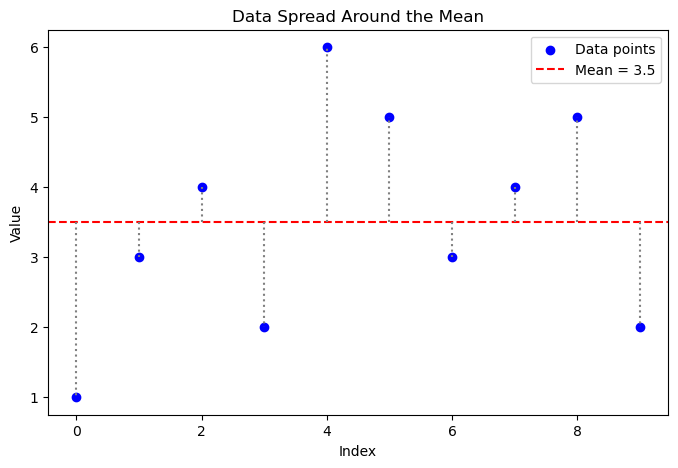

In [75]:
import matplotlib.pyplot as plt

# Plot data points
plt.figure(figsize=(8, 5))
plt.scatter(range(len(data)), data, color="blue", label="Data points")

# Plot mean line
plt.axhline(mean_value, color="red", linestyle="--", label=f"Mean = {mean_value}")

# Draw deviation lines
for i, val in enumerate(data):
    plt.plot([i, i], [mean_value, val], color="gray", linestyle=":")

plt.title("Data Spread Around the Mean")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


### Visualizing Data Spread Around the Mean

This plot helps illustrate how each data point deviates from the mean value.

- **`plt.scatter()`** plots the individual data points.  
- **`plt.axhline()`** draws a horizontal dashed line at the mean to show the central tendency.  
- The gray **vertical lines** represent the deviation of each data point from the mean.  
- Labels, title, and legend are added to make the plot more readable.

The resulting chart visually shows how data points are distributed around the mean and how far each point deviates from it.


**Chemical Engineering Example:**  
Analyze fluctuation of reactor temperature readings.


In [37]:
reactor_temps = [500, 505, 498, 502, 507, 503, 499]

print("Minimum Temperature", min(reactor_temps))
print("Maximum Temperature", max(reactor_temps))
print("Mean:", stats.mean(reactor_temps))
print("Stdev:", stats.stdev(reactor_temps))


Minimum Temperature 498
Maximum Temperature 507
Mean: 502
Stdev: 3.265986323710904


## 4.19 Wrap-Up
- Functions make code reusable and modular
- Parameters, defaults, and scope are key
- Randomness and math modules help with simulations
- Functions are essential in modeling chemical engineering problems


## Activity 1: Reynolds Number Function

Write a Python function to calculate the **Reynolds number**:

$$
Re = \frac{\rho u D}{\mu}
$$

- Your function should accept four arguments:  
  - ρ (density, kg/m³)  
  - u (velocity, m/s)  
  - D (pipe diameter, m)  
  - μ (viscosity, Pa·s)  

**Tasks:**
1. Compute the Reynolds number for:
   - Water at 25°C: ρ = 1000, μ = 0.001 Pa·s, u = 1.5 m/s, D = 0.05 m  
   - Air at 25°C: ρ = 1.2, μ = 1.8e-5 Pa·s, u = 2.0 m/s, D = 0.1 m  
2. Based on your results, classify the flow as **Laminar (Re < 2100)** or **Turbulent (Re > 4000)**.


## Activity 2: Monte Carlo Simulation of Reaction Yield

A catalytic reaction has an **average yield of 85%**, but due to catalyst activity variations, the yield can fluctuate by ±5%.  

**Tasks:**
1. Write a function `reaction_yield(base_yield, variation)` that returns a random yield between:
   $$
   base\_yield \times (1 - variation) \quad \text{and} \quad base\_yield \times (1 + variation)
   $$
2. Run the simulation **100 times** and store the results in a list.
3. Calculate:
   - The **mean yield**  
   - The **standard deviation of yield**  
4. Plot a **histogram** of the simulated yields.  
   - Hint: Use `matplotlib.pyplot.hist`.
